# Read the CSV files

## Housing Price Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)


In [16]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

## Exploring the Count of Missing Values in Each Column

In [12]:
column_with_nan = housing.columns[housing.isnull().any()]
for column in column_with_nan:
    print(column, housing[column].isnull().sum())

LotFrontage 462
Alley 2412
MasVnrType 14
MasVnrArea 14
BsmtQual 69
BsmtCond 69
BsmtExposure 71
BsmtFinType1 69
BsmtFinSF1 1
BsmtFinType2 70
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
BsmtFullBath 2
BsmtHalfBath 2
FireplaceQu 1241
GarageType 127
GarageYrBlt 129
GarageFinish 129
GarageCars 1
GarageArea 1
GarageQual 129
GarageCond 129
PoolQC 2571
Fence 2055
MiscFeature 2483


In [17]:
## Thanks Jack for this i appreciate you

## LotFrontage -- replace with mean of the column 
housing['LotFrontage'].fillna(value = housing['LotFrontage'].mean(), inplace = True)

## Replace Nulls where NA just means that the house does not have the feature 

## Basement metrics
housing['BsmtQual'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtCond'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtExposure'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtFinType1'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtFinType2'].fillna(value = 'No_Basement', inplace=True)

## Garage Type 
housing['GarageType'].fillna(value = 'No_Garage', inplace=True)
housing['GarageYrBlt'].fillna(value = 'No_Garage', inplace=True)
housing['GarageFinish'].fillna(value = 'No_Garage', inplace=True)
housing['GarageQual'].fillna(value = 'No_Garage', inplace=True)
housing['GarageCond'].fillna(value = 'No_Garage', inplace=True)

## Replace other nulls where null just means the feature is not there 
housing['FireplaceQu'].fillna(value = 'No_Fireplace', inplace=True)
housing['PoolQC'].fillna(value = 'No_Pool', inplace=True)
housing['Fence'].fillna(value = 'No_Fence', inplace=True)
housing['MiscFeature'].fillna(value = 'No_Misc', inplace=True)
housing['Alley'].fillna(value = 'No_alley', inplace=True)

##----------------------------------------------------------------##

##Replacing nulls with 0s

housing['BsmtFinSF1'].fillna(value = 0, inplace=True)
housing['BsmtFinSF2'].fillna(value = 0, inplace=True)
housing['BsmtUnfSF'].fillna(value = 0, inplace=True)
housing['MasVnrType'].fillna(value = 0, inplace=True)
housing['TotalBsmtSF'].fillna(value = 0, inplace=True)
housing['MasVnrArea'].fillna(value = 0, inplace=True)
housing['BsmtFullBath'].fillna(value = 0, inplace=True)
housing['BsmtHalfBath'].fillna(value = 0, inplace=True)
housing['GarageCars'].fillna(value = 0, inplace=True)
housing['GarageArea'].fillna(value = 0, inplace=True)


## At this point, only one null value remains in the "Electric Column". We will just remove that one row 
housing.dropna(axis = 0, inplace = True)

## Comparing Price Versus 1st Floor Square Footage

In [76]:
from sklearn.linear_model import LinearRegression
price = housing['SalePrice']
area = housing[['1stFlrSF']]
lm = LinearRegression()
lm.fit(np.log(area), np.log(price))
lm.score(np.log(area), np.log(price))

0.38915650616285624

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


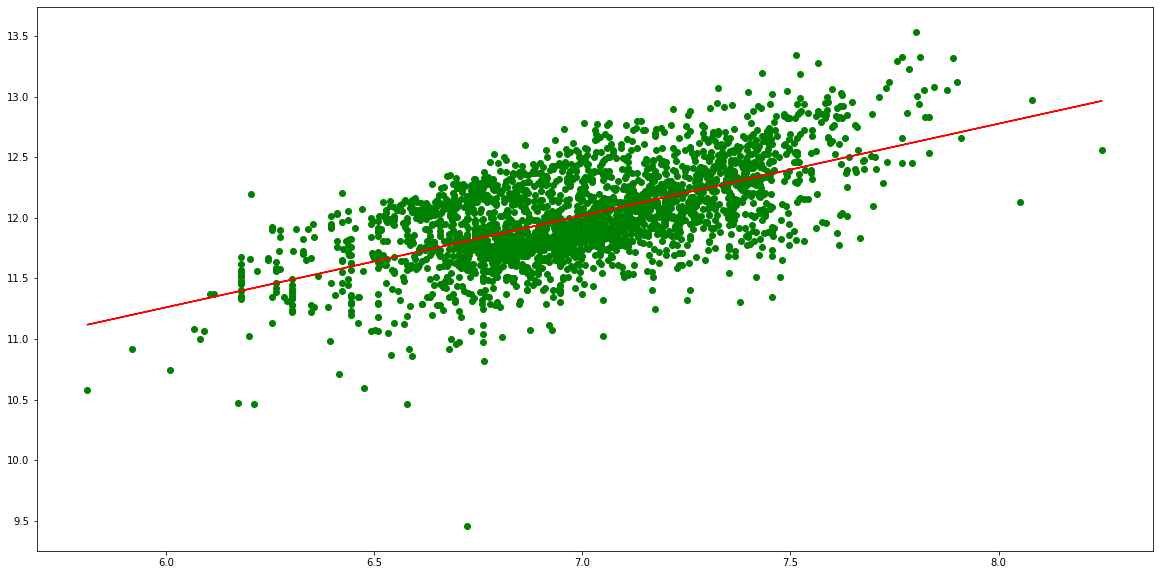

In [84]:
x = np.array(housing['1stFlrSF'])
y = np.array(housing['SalePrice'])
plt.scatter(np.log(x) , np.log(y), color='green')

a = np.log(x).reshape(-1,1)

plt.plot(a, lm.predict(a), c = 'r', lw = 1.5, label='Original Predicted relation')

In [38]:
categorical = ['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood']
ordinal = ['OverallQual', 'OverallCond', 'KitchenQual', 'FireplaceQu', 'HeatingQC', 'BsmtQual', 'BsmtCond']

## Merging the Addresses onto the Housing dataset

In [181]:
# reading the real estate data
realestate = pd.read_csv('Ames Real Estate Data.csv')
realestate.head()

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [182]:
# checking the type of PID and GeoRefNo columns in housing and real estate respectively
print(housing.dtypes['PID'])
print(realestate.dtypes['GeoRefNo'])

int64
int64


In [183]:
# rename housing 'GeoRefNo' column to 'PID' to merge dataframe
realestate.rename(columns = {'GeoRefNo':'PID'}, inplace = True)
realestate.rename(columns = {'Prop_Addr':'Address'}, inplace = True)

In [184]:
realestate.rename(columns = {'Prop_Addr':'Address'}, inplace = True)

In [185]:
realestate = realestate[['Address', 'PID']]
houses = housing[['SalePrice', 'PID']]
merged = houses.merge(realestate, how='inner', on='PID')

In [ ]:
# finding which addresses get repeated
PID = merged['PID']
repeated = merged[PID.isin(PID[PID.duplicated()])].sort_values('PID')
repeated # ran the code block again after removing the duplicates to check that nothing repeated

In [187]:
# removing all the repeated addresses
merged = merged.drop_duplicates(subset = ['PID'])

# checking to see if a repeated address shows up only once
merged.loc[merged['PID'] == 923226300]

merged['Address'] = merged['Address'] + ' Ames Iowa'

## Adding Latitude and Longitude

In [7]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from geopy.extra.rate_limiter import RateLimiter

In [38]:
geolocator = GoogleV3(user_agent = 'housing', api_key = 'yourapikey')

geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 0.05)

# doing a sample case to see that the address formatted in the dataframe 
# would still be valid enough to return correct latitude and longitude coordinates

location = geolocator.geocode('3629 CHILTON AVE Ames Iowa')

print(location.latitude, location.longitude)

41.98649987838884 -93.60213991860324


In [206]:
for i in range(261):
    merged.loc[i*10:(i+1)*10,'Coordinates'] = merged.loc[i*10:(i+1)*10,'Address'].apply(geocode)
    merged.loc[i*10:(i+1)*10,'Lat'] = merged.loc[i*10:(i+1)*10,'Coordinates'].apply(lambda x: x.latitude if x else None)
    merged.loc[i*10:(i+1)*10,'Lon'] = merged.loc[i*10:(i+1)*10,'Coordinates'].apply(lambda x: x.longitude if x else None)
    print(i, end = '\r')

In [ ]:
# merged['Coordinates'] = merged['Address'].apply(geocode)
# merged['Lat'] = merged['Coordinates'].apply(lambda x: x.latitude if x else None)
# merged['Lon'] = merged['Coordinates'].apply(lambda x: x.longitude if x else None)

In [208]:
merged.to_csv('housinglatlong.csv')

## Plotting the houses onto a Map

In [210]:
import json
import geopandas as gpd
from geopandas import GeoDataFrame

In [226]:
df = pd.read_csv('housinglatlong.csv')

print('Latitude max is ' + str(df['Lat'].max()))
print('Latitude min is ' + str(df['Lat'].min()))
print()
print('Longitude max is ' + str(df['Lon'].max()))
print('Longitude min is ' + str(df['Lon'].min()))

Latitude max is 42.0634011
Latitude min is 41.9863214

Longitude max is -93.5794897
Longitude min is -93.693158


In [231]:
df_final = df.drop(['PID', 'Address'], axis=1)


In [295]:
df_final.to_csv('finalhousing.csv')

In [238]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

### Using Basemap

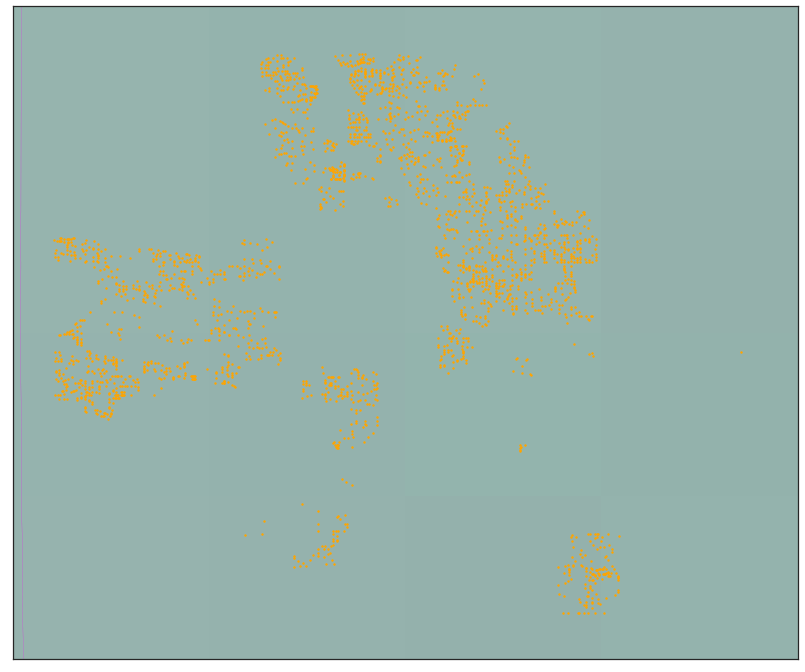

In [314]:
m = Basemap(projection = 'mill',
           llcrnrlat = 41.98,
           urcrnrlat = 42.07,
           llcrnrlon = -93.7,
           urcrnrlon = -93.57,
           resolution = 'h')

fig = plt.figure(figsize=(16, 12))

lat = df['Lat'].values
lon = df['Lon'].values
lons, lats = m(lon, lat)

m.drawcountries(color = 'brown')
m.drawstates(color = 'black') 
m.drawcounties(color = 'magenta')
m.drawrivers(color = 'blue')
m.shadedrelief()

m.scatter(lons, lats, marker = 'o', color = 'orange', s = 2)
plt.show()

### Using GeoPandas 

In [296]:
gdf = gpd.read_file('ames.geojson')

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/fiona/collection.py:208: FeatureWarning:

Empty field name at index 0

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:600: UserWarning:

Empty field name at index 0



In [297]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

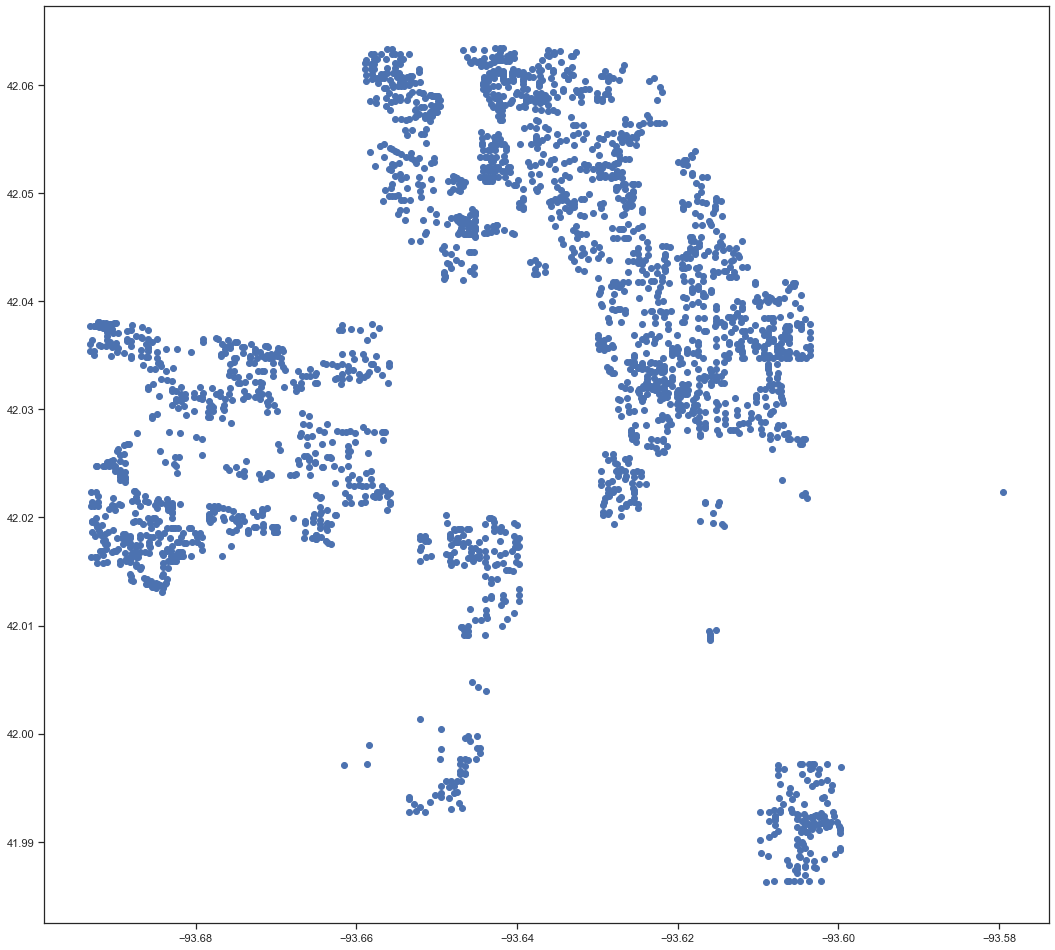

In [313]:
gdf.plot(figsize = (18, 18))


### Using Folium

In [13]:
import pandas as pd
housing = pd.read_csv('finalhousing.csv', index_col = [0])
housing.drop(housing.filter(regex="Unname"),axis=1, inplace=True)
housing.head()

,SalePrice,Coordinates,Lat,Lon
0,126000,"436 Hayward Ave, Ames, IA 50014, USA",42.017780,-93.651452
1,139500,"3416 West St, Ames, IA 50014, USA",42.024697,-93.664186
2,124900,"320 S 2nd St, Ames, IA 50010, USA",42.021389,-93.614855
3,114000,"1524 Douglas Ave, Ames, IA 50010, USA",42.038070,-93.612065
4,227000,"2304 Fillmore Ave, Ames, IA 50010, USA",42.044900,-93.631893


In [14]:
import folium
map = folium.Map(location=[housing.Lat.mean(), housing.Lon.mean()], zoom_start=14, control_scale=True)

housing.apply(lambda row:folium.CircleMarker(location=[row["Lat"], row["Lon"]], 
                                             radius = row["SalePrice"]/110000,
                                             color = False,
                                             fill_color = 'red',
                                             fill = True,
                                             fill_opacity = 0.6).add_to(map),  
                                             axis=1)
    
map

## EDA

In [25]:
import pandas as pd
pd.set_option('display.max_columns', 500)
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,68.516053,7890,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1984,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,No_Pool,No_Fence,No_Misc,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,1930,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,No_Pool,No_Fence,No_Misc,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No_Fireplace,Detchd,1940,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,No_Fireplace,Attchd,2001,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,No_Pool,No_Fence,No_Misc,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,68.516053,8854,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,68.516053,13680,Pave,No_alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Basement,No_Basement,No_Basement,No_Basement,0.0,No_Basement,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,No_Misc,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.000000,6270,Pave,No_alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,Metal

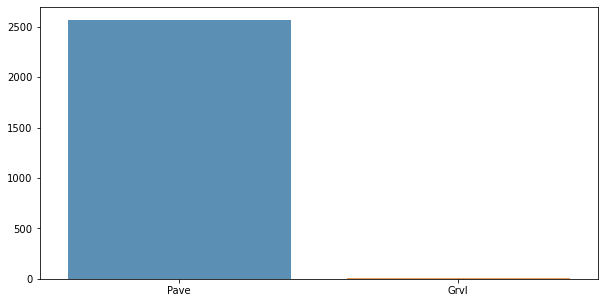

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

streetcount  = housing['Street'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(streetcount.index, streetcount.values, alpha=0.8)

## In conclusion let's kick out street 

In [47]:
# creating a function of seeing the counts of the different data results of each column

housingcat = housing.drop(['PID', 'GrLivArea', 'SalePrice', 'LotFrontage', 'LotArea', 'YearBuilt',
                          'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
                          '1stFlrSF', '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
                          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LowQualFinSF',
                          'BsmtUnfSF', 'MiscVal'], axis = 1)

categvar = list(housingcat.columns)

def countplot(list):
    for column in categvar:
        count = housing[column].value_counts()
        plt.figure(figsize=(10,5))
        sns.barplot(count.index, count.values, alpha=0.8)
        plt.xlabel(column)

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


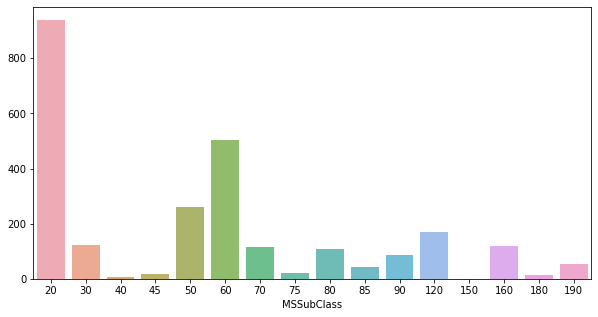

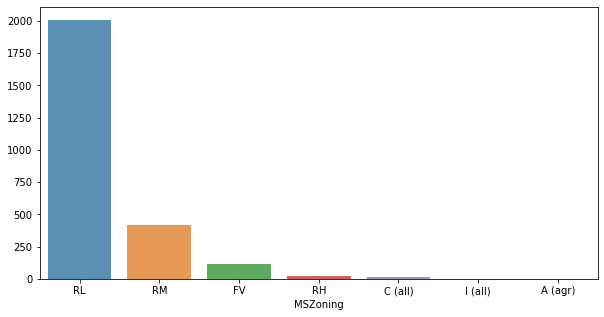

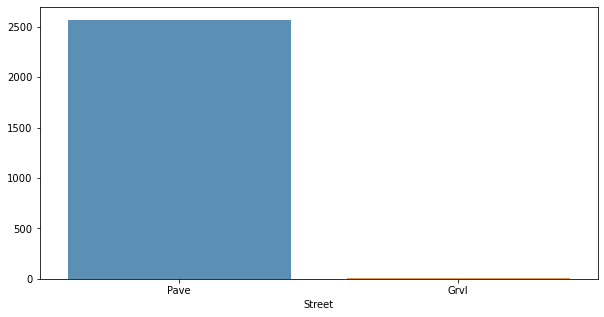

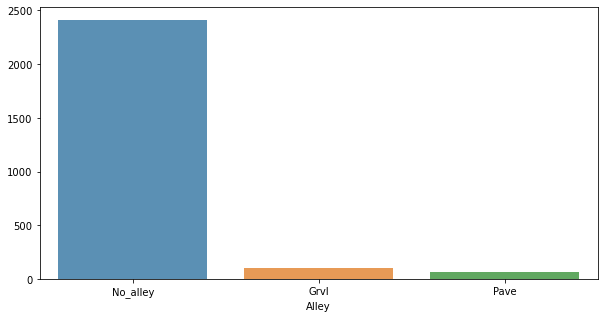

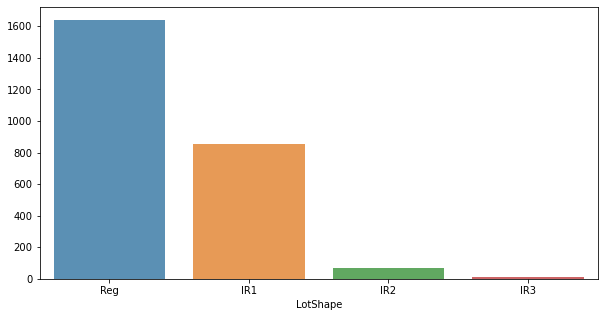

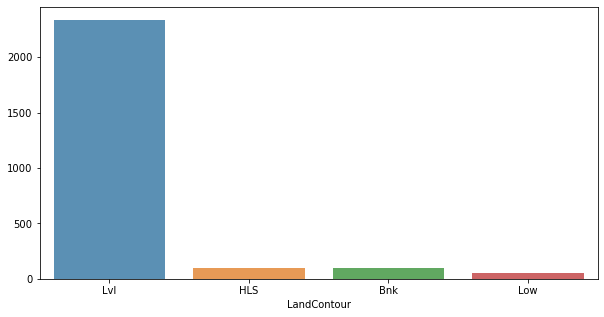

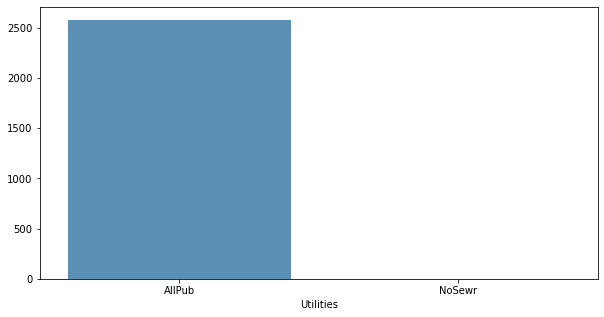

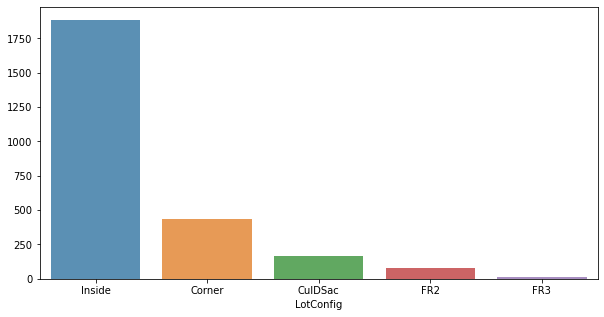

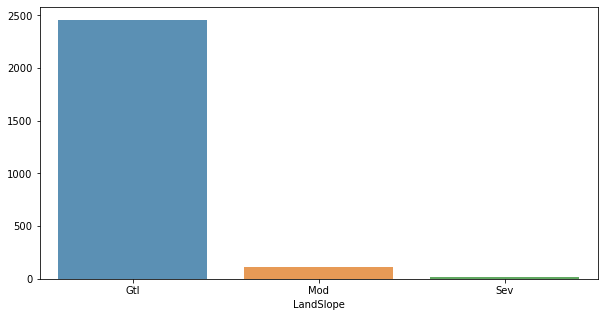

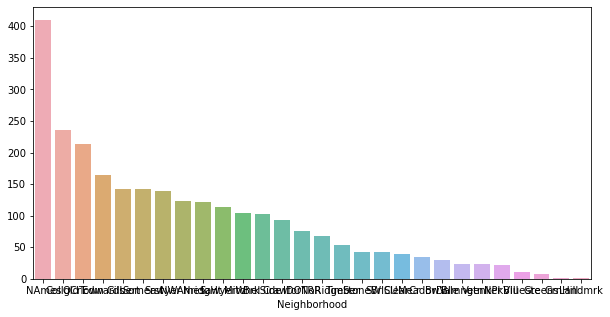

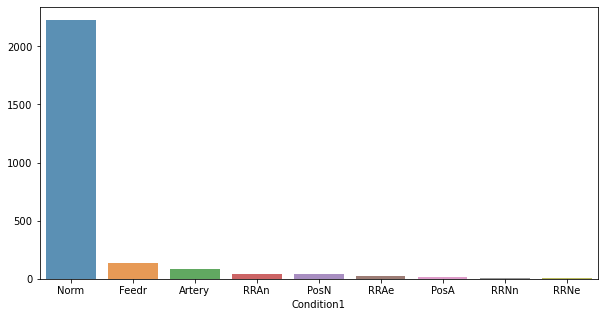

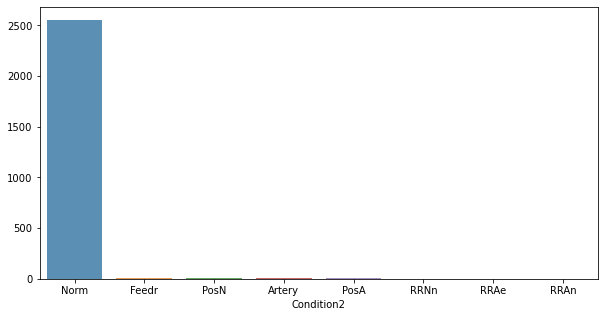

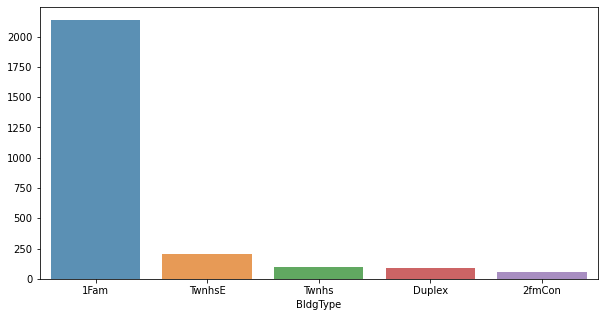

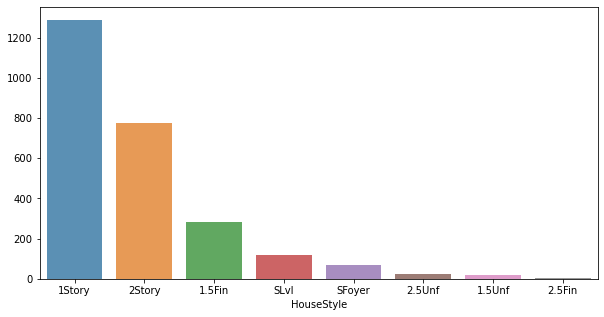

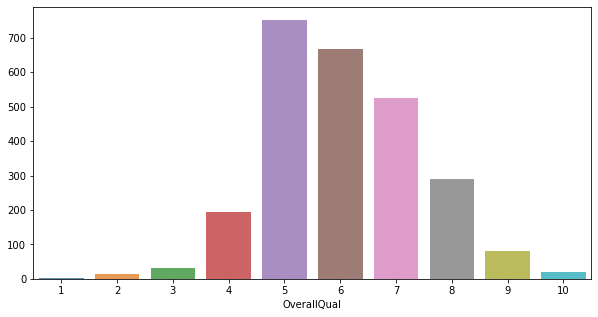

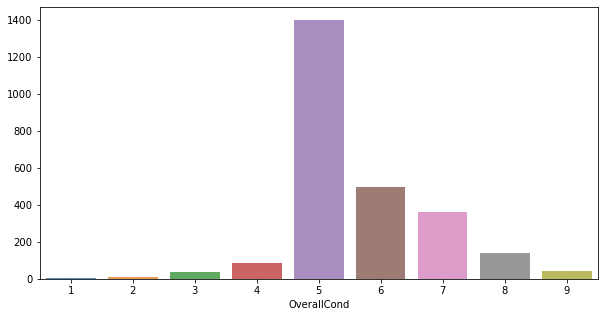

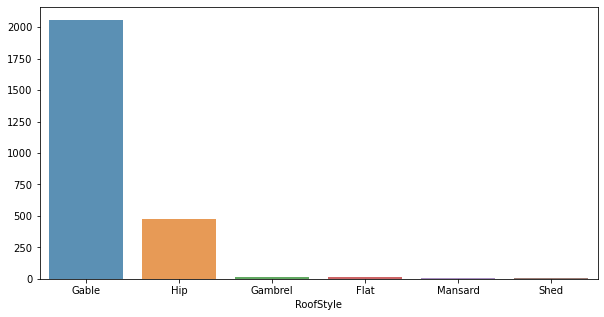

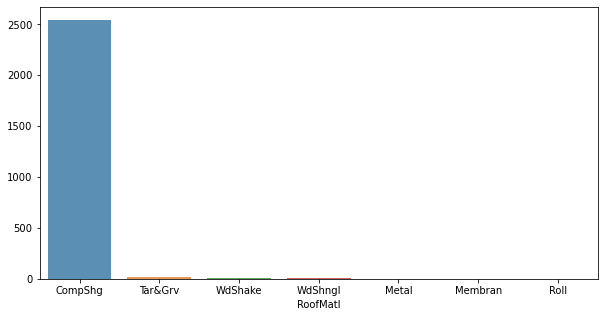

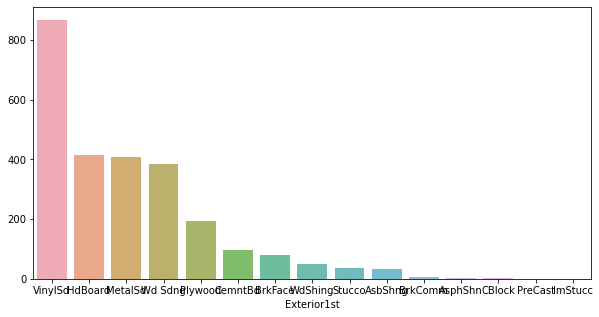

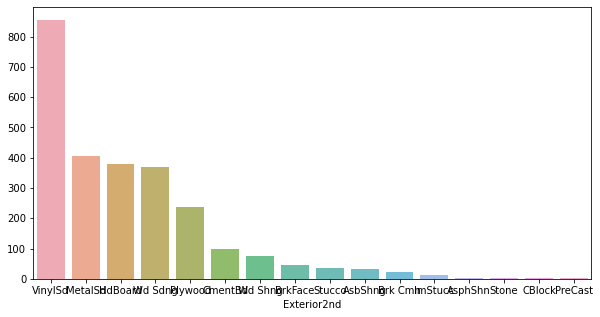

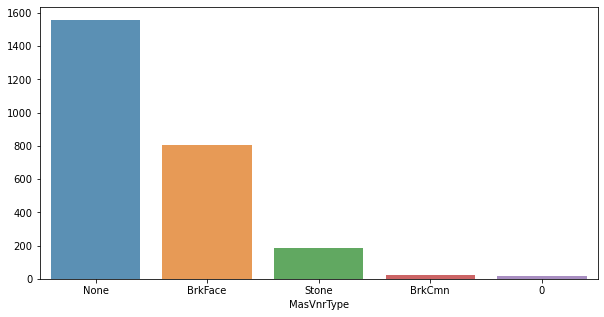

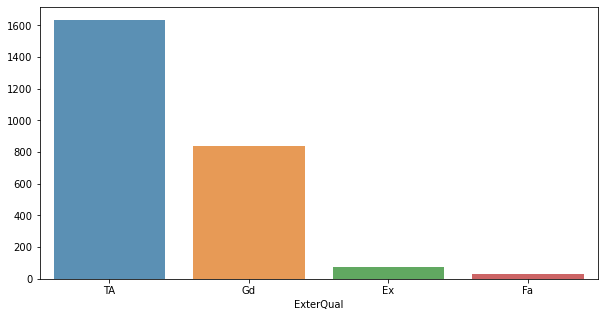

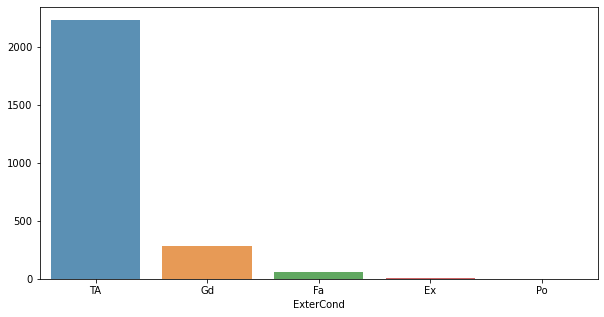

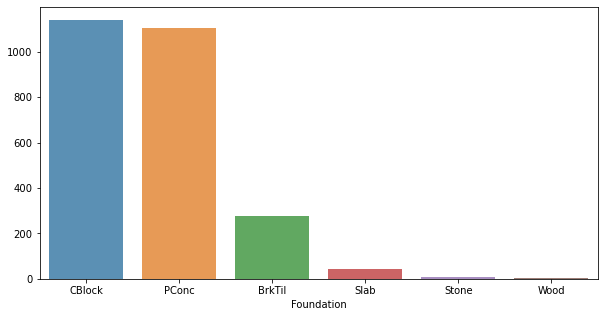

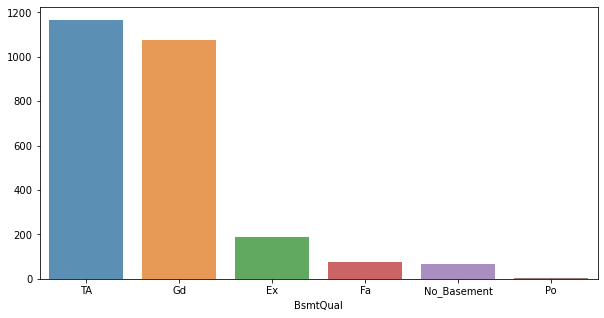

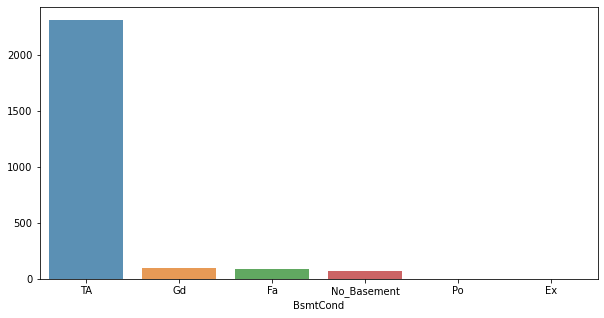

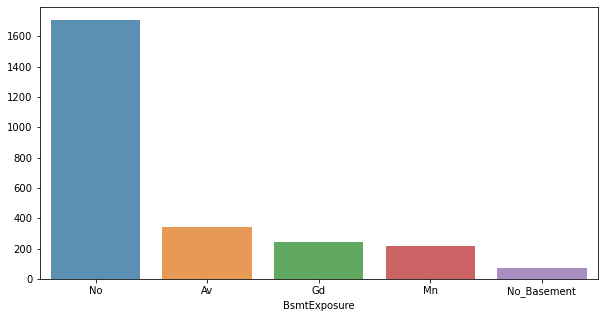

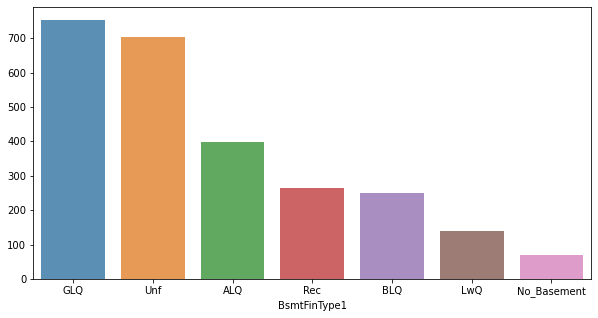

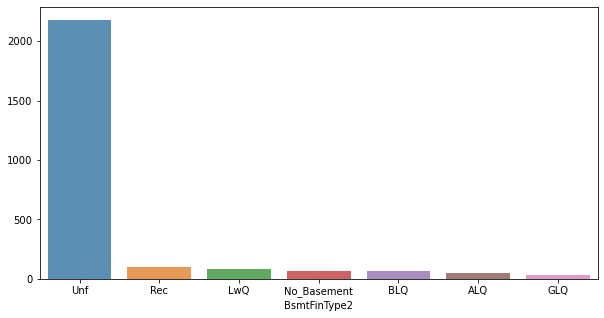

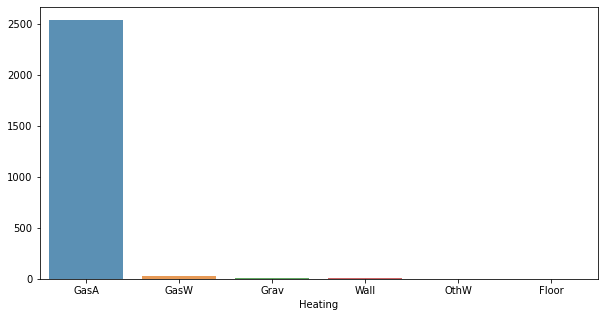

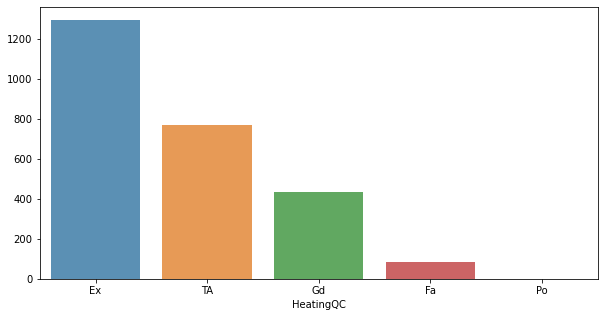

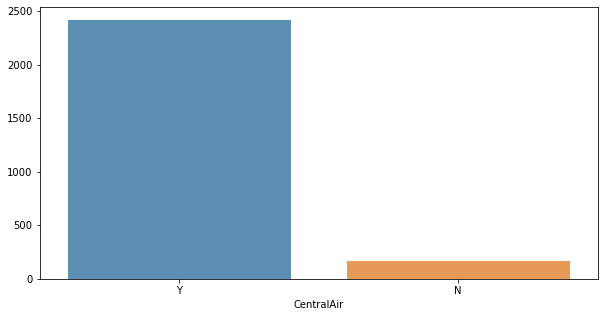

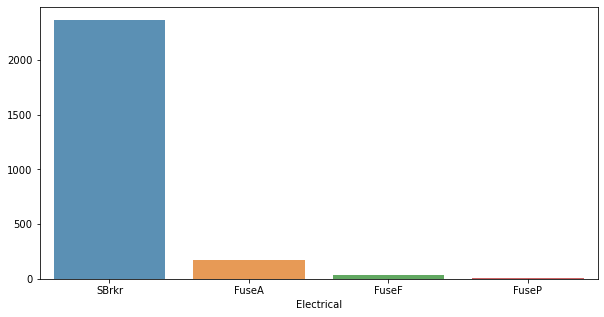

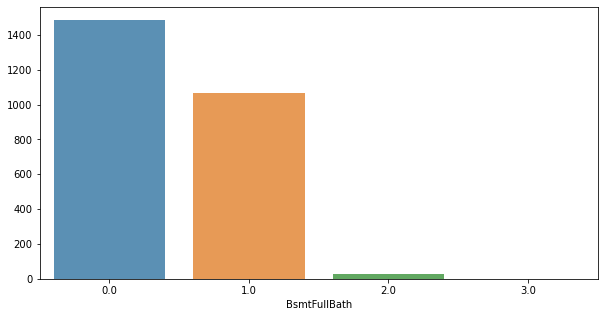

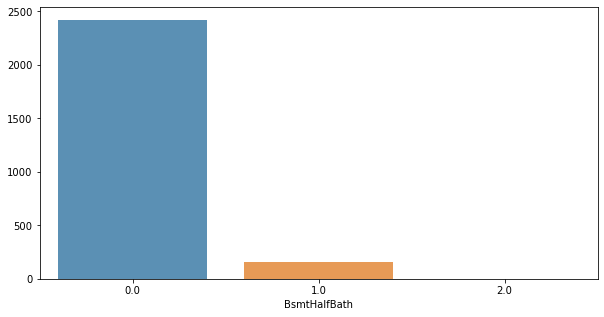

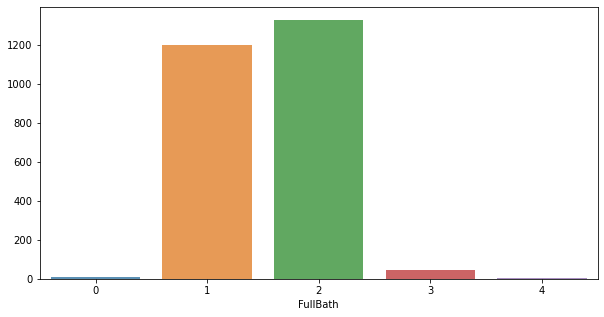

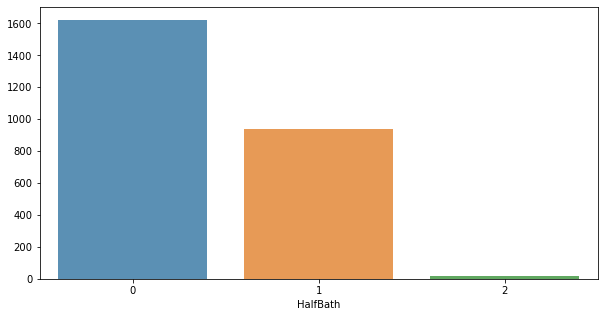

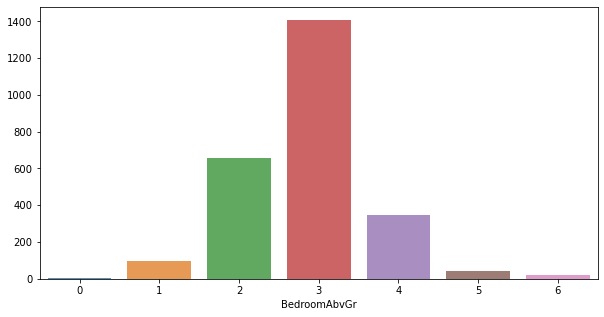

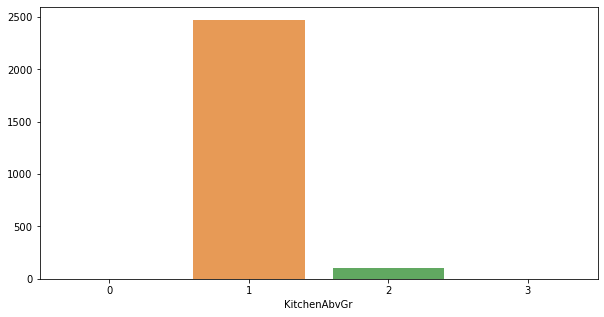

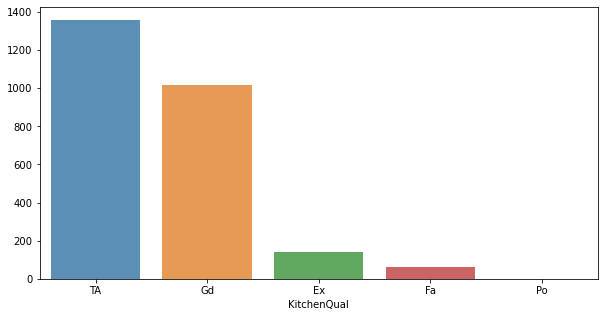

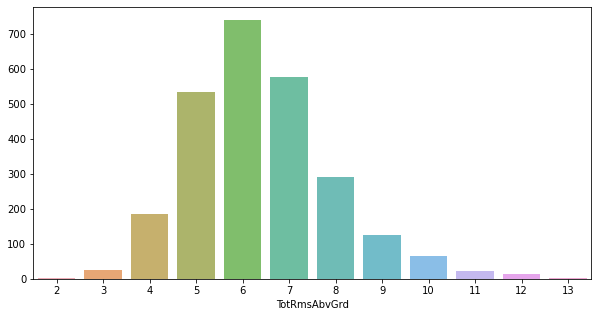

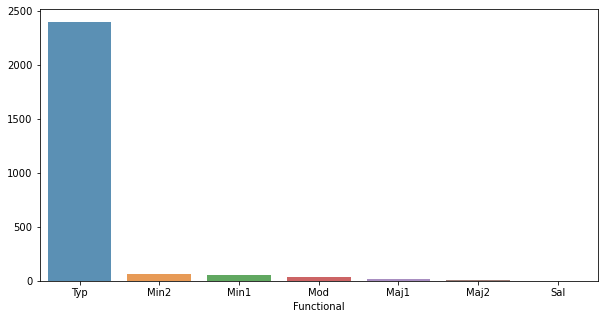

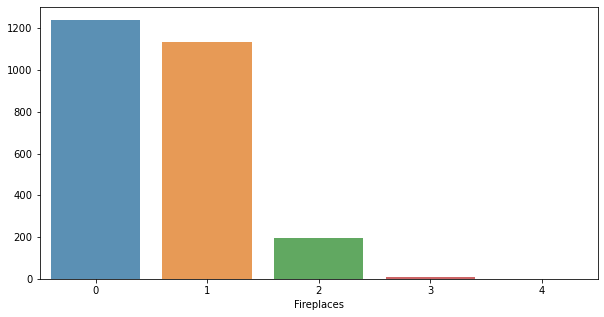

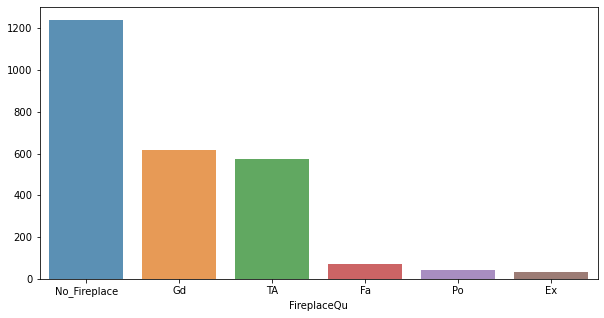

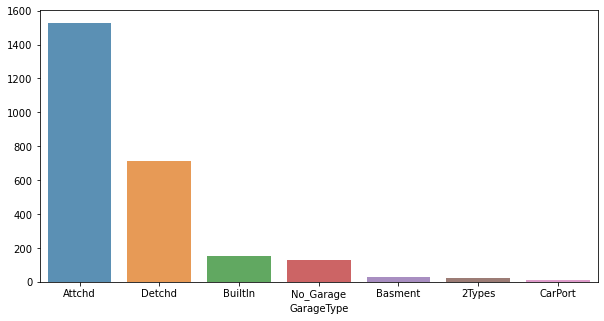

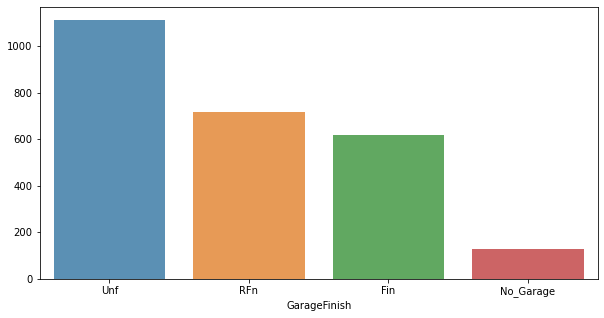

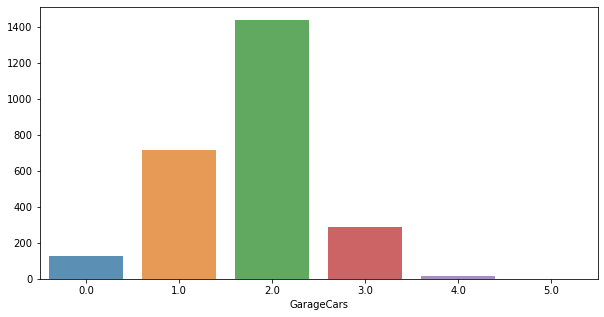

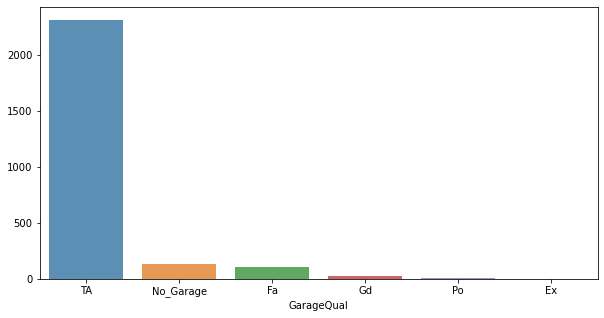

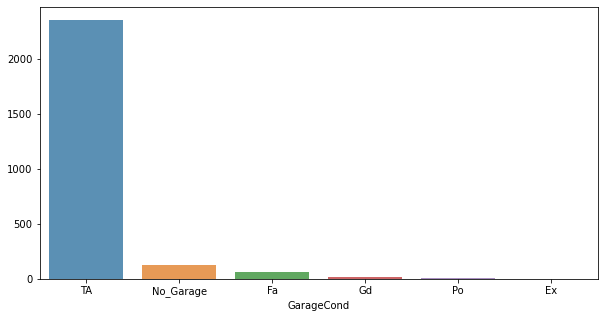

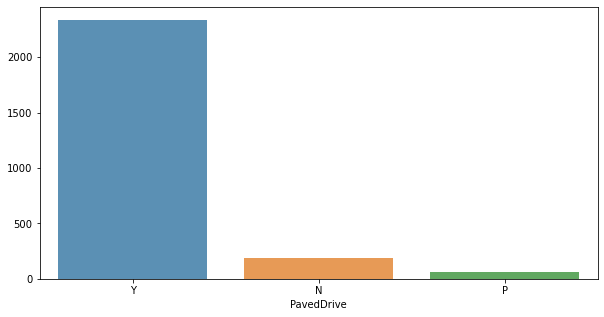

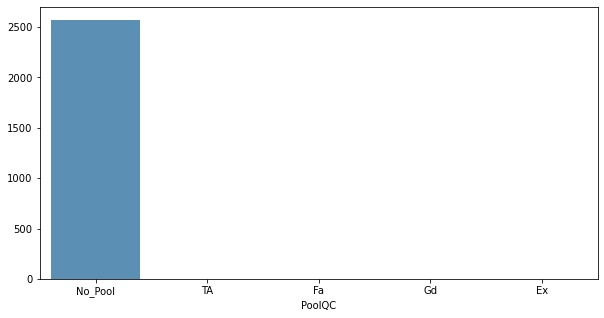

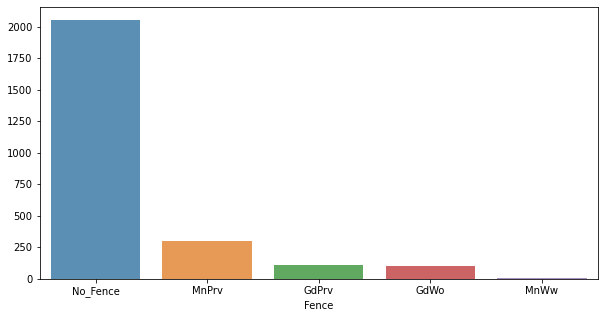

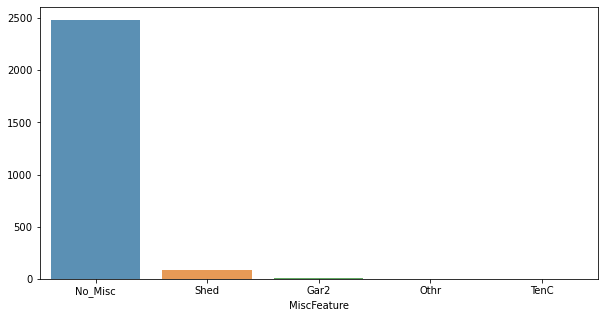

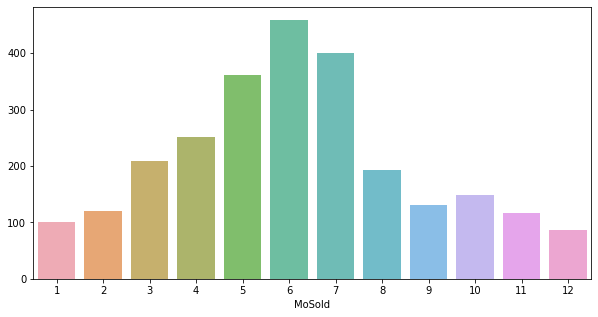

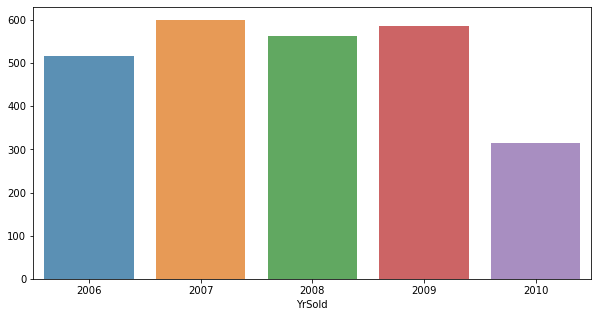

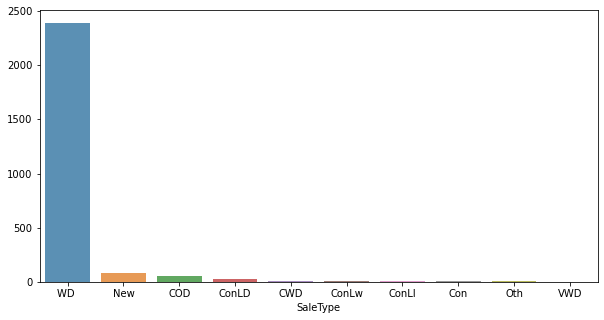

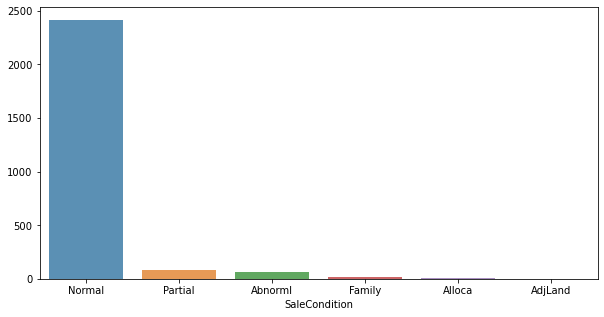

In [48]:
countplot(categvar)

In [54]:
def normcountplot(list):
    for column in categvar:
        count = housing[column].value_counts(normalize = True)
        print(count)
        print()

In [55]:
normcountplot(categvar)

20     0.364095
60     0.194649
50     0.100427
120    0.065529
30     0.047693
160    0.046530
70     0.044979
80     0.041877
90     0.033734
190    0.020551
85     0.016673
75     0.008143
45     0.006592
180    0.005816
40     0.002326
150    0.000388
Name: MSSubClass, dtype: float64

RL         0.778209
RM         0.162078
FV         0.043815
RH         0.008143
C (all)    0.006592
I (all)    0.000775
A (agr)    0.000388
Name: MSZoning, dtype: float64

Pave    0.996123
Grvl    0.003877
Name: Street, dtype: float64

No_alley    0.934858
Grvl        0.040713
Pave        0.024428
Name: Alley, dtype: float64

Reg    0.635905
IR1    0.331524
IR2    0.027530
IR3    0.005041
Name: LotShape, dtype: float64

Lvl    0.905777
HLS    0.037224
Bnk    0.036836
Low    0.020163
Name: LandContour, dtype: float64

AllPub    0.999225
NoSewr    0.000775
Name: Utilities, dtype: float64

Inside     0.730903
Corner     0.170221
CulDSac    0.063591
FR2        0.030244
FR3        0.005041
Name: LotConfig,

In [56]:
housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,68.516053,7890,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,No_Pool,No_Fence,No_Misc,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.000000,4235,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,No_Fireplace,Attchd,1984,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,No_Pool,No_Fence,No_Misc,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.000000,6060,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,No_Fireplace,Detchd,1930,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,No_Pool,No_Fence,No_Misc,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.000000,8146,Pave,No_alley,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,No_Fireplace,Detchd,1940,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.000000,8400,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,No_Fireplace,Attchd,2001,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,No_Pool,No_Fence,No_Misc,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,68.516053,8854,Pave,No_alley,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,Grav,Fa,N,FuseF,952,0,0,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,1916,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,No_Pool,No_Fence,No_Misc,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,68.516053,13680,Pave,No_alley,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,No_Basement,No_Basement,No_Basement,No_Basement,0.0,No_Basement,0.0,0.0,0.0,GasA,Ex,Y,FuseA,1733,0,0,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,1955,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,No_Pool,No_Fence,No_Misc,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.000000,6270,Pave,No_alley,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,MetalSd,Metal

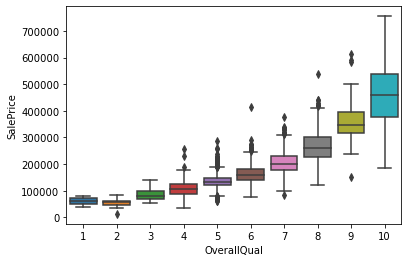

In [63]:
sns.boxplot(x = "OverallQual", y = "SalePrice", data = housing)

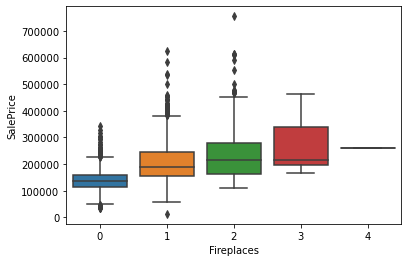

In [66]:
sns.boxplot(x = "Fireplaces", y = "SalePrice", data = housing)